In [100]:
import pandas as pd
import quandl

# Pulled API codes from Quandl  
https://www.quandl.com/api/v3/databases/EIA/codes

In [101]:
eia_codes = pd.read_csv('EIA-datasets-codes.csv',names=['API_Key','Description'])
eia_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1524531 entries, 0 to 1524530
Data columns (total 2 columns):
API_Key        1524531 non-null object
Description    1524531 non-null object
dtypes: object(2)
memory usage: 23.3+ MB


### What information is available in the description?

In [102]:
eia_codes.loc[70]

API_Key                         EIA/PET_M_EPC43B_FPF_SWY_MBBLD_M
Description    Wyoming Crude Oil and Lease Condensate Product...
Name: 70, dtype: object

# Obtain your own Quandl API code

In [17]:
quandl.ApiConfig.api_key = "your_api_code_here"

### Dataset heirarchy can be found here:

https://www.eia.gov/opendata/qb.php?category=714755

- Next cell is very bulky  
- Figure out a better way

## One large table
- Difficult to see and name all columns
- Going to split up by category and name columns
### Data sets in (Thousand Barrels) only ###

In [18]:
crude = pd.concat([
        #EIA Data Sets > Petroleum > Summary
        #EIA Data Sets > Petroleum > Prices
        #EIA Data Sets > Petroleum > Crude Reserves and Production
        #EIA Data Sets > Petroleum > Refining and Processing
        #EIA Data Sets > Petroleum > Imports/Exports and Movements
        #EIA Data Sets > Petroleum > Stocks
        #EIA Data Sets > Petroleum > Consumption/Sales
    
        #EIA Data Sets > Petroleum > Summary
        #EIA Data Sets > Petroleum > Summary > Supply and Disposition > by Product > Crude Oil
        quandl.get('EIA/PET_MCRSCUS1_M'), #U.S. Crude Oil Stock Change, Monthly
        quandl.get('EIA/PET_MCRSTUS1_M'), #U.S. Ending Stocks of Crude Oil, Monthly
        quandl.get('EIA/PET_MCREXUS1_M'), #U.S. Exports of Crude Oil, Monthly
        quandl.get('EIA/PET_MCRFPUS1_M'), #U.S. Field Production of Crude Oil, Monthly
        quandl.get('EIA/PET_MCRIMUS1_M'), #U.S. Imports of Crude Oil, Monthly
        quandl.get('EIA/PET_MCRUPUS1_M'), #U.S. Product Supplied of Crude Oil, Monthly
        quandl.get('EIA/PET_MCRRIUS1_M'), #U.S. Refinery and Blender Net Input of Crude Oil, Monthly
        quandl.get('EIA/PET_MCRUA_NUS_1_M'), #U.S. Supply Adjustment of Crude Oil, Monthly
    
        #EIA Data Sets > Petroleum > Summary > Weekly Supply Estimates > by Data Series
        
    
        #EIA Data Sets > Petroleum > Summary > U.S. Crude Oil Supply & Disposition
    
        #EIA Data Sets > Petroleum > Prices
        #EIA Data Sets > Petroleum > Prices > Spot Prices
        #quandl.get('EIA/PET_RWTC_D'), #Cushing, OK WTI Spot Price FOB, Daily
        quandl.get('EIA/PET_RWTC_M'), #Cushing, OK WTI Spot Price FOB, Monthly

        #EIA Data Sets > Petroleum > Prices > NYMEX Futures Prices
        quandl.get('EIA/PET_RCLC1_M'), #Cushing, OK Crude Oil Future Contract 1, Monthly
        quandl.get('EIA/PET_RCLC2_M'), #Cushing, OK Crude Oil Future Contract 2, Monthly
        quandl.get('EIA/PET_RCLC3_M'), #Cushing, OK Crude Oil Future Contract 3, Monthly
        quandl.get('EIA/PET_RCLC4_M'), #Cushing, OK Crude Oil Future Contract 4, Monthly
    
        #EIA Data Sets > Petroleum > Crude Reserves and Production
        #EIA Data Sets > Petroleum > Crude Reserves and Production > Crude Oil Production
        quandl.get('EIA/PET_MCRFPUS1_M'), #U.S. Field Production of Crude Oil, Monthly
        
        #EIA Data Sets > Petroleum > Crude Reserves and Production > Crude Oil and Natural Gas Drilling Activity
        quandl.get('EIA/PET_E_ERTRRO_XR0_NUS_C_M'), #U.S. Crude Oil Rotary Rigs in Operation, Monthly
        quandl.get('EIA/PET_E_ERTS0_XRS_NUS_C_M'), #U.S. Crude Oil and Natural Gas Active Well Service Rigs in operation, Monthly
        quandl.get('EIA/PET_E_ERTRR0_XR0_NUS_C_M'), #U.S. Crude Oil and Natural Gas Rotary Rigs in Operation, Monthly
        quandl.get('EIA/PET_E_ERTRR0_XR0_RUSOF_C_M'), #U.S. Offshore Crude Oil and Natural Gas Rotary Rigs in Operation, Monthly
        quandl.get('EIA/PET_E_ERTRR0_XR0_RUSON_C_M'), #U.S. Onshore Crude Oil and Natural Gas Rotary Rigs in Operation, Monthly
    
        #EIA Data Sets > Petroleum > Crude Reserves and Production > Crude Oil and Natural Gas Exploratory and Development Wells
        quandl.get('EIA/PET_E_ERTWO_XWCD_NUS_C_M'), #U.S. Crude Oil Developmental Wells Drilled, Monthly
        quandl.get('EIA/PET_E_ERTWO_XWCE_NUS_C_M'), #U.S. Crude Oil Exploratory Wells Drilled, Monthly 
        quandl.get('EIA/PET_E_ERTW0_XWCD_NUS_C_M'), #U.S. Crude Oil, Natural Gas, and Dry Developmental Wells Drilled, Monthly
   
        #EIA Data Sets > Petroleum > Crude Reserves and Production > Costs of Crude Oil and Natural Gas Wells Drilled
        quandl.get('EIA/PET_E_ERTWO_XWWN_NUS_MDW_A') #U.S. Nominal Cost per Crude Oil Well Drilled, Annual    
    
        ##EIA Data Sets > Petroleum > Refining and Processing
    
        ##EIA Data Sets > Petroleum > Imports/Exports and Movements
    
        ##EIA Data Sets > Petroleum > Stocks
    
        ##EIA Data Sets > Petroleum > Consumption/Sales

        ],axis=1)
crude.tail()

,Value,Value,Value,Value,Value,Value,Value,Value,Value,Value,...,Value,Value,Value,Value,Value,Value,Value,Value,Value,Value
Date,,,,,,,,,,,,,,,,,,,,,
2016-11-30,-186.0,1183724.0,17916.0,265886.0,241606.0,0.0,486561.0,-3201.0,45.66,45.87,...,265886.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,-4310.0,1179414.0,13691.0,272039.0,243664.0,0.0,511924.0,5602.0,51.97,52.17,...,272039.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-31,20124.0,1199538.0,23126.0,273890.0,261497.0,0.0,500013.0,7876.0,52.50,52.61,...,273890.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.47,53.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.33,49.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Need to name the columns 
- Searching for the API Key and passing column headers to list should do the trick

# Split up the API calls by category

## Summary
- Supply and Disposition
- Weekly Supply Estimates
- U.S. Crude Oil Supply & Disposition

##### Supply and Disposition
- EIA Data Sets > Petroleum > Summary > Supply and Disposition > by Product > Crude Oil

eia_codes[eia_codes['Description'].str.contains('U.S. |Monthly')].set_index('API Key')

In [53]:
sd = eia_codes[eia_codes['API_Key'].str.contains('^EIA/PET_MCR.*US1_M$',regex=True)] 
sd_list = list(sd.API_Key)
sd

,API_Key,Description
23586,EIA/PET_MCRSAUS1_M,U.S. Crude Oil Stocks in Transit (on Ships) fr...
117741,EIA/PET_MCRIMUS1_M,"U.S. Imports of Crude Oil, Monthly"
117755,EIA/PET_MCRRSUS1_M,"U.S. Crude Oil Stocks at Refineries, Monthly"
151433,EIA/PET_MCRSCUS1_M,"U.S. Crude Oil Stock Change, Monthly"
151497,EIA/PET_MCRFPUS1_M,"U.S. Field Production of Crude Oil, Monthly"
511870,EIA/PET_MCRUPUS1_M,"U.S. Product Supplied of Crude Oil, Monthly"
676408,EIA/PET_MCRSLUS1_M,"U.S. Crude Oil Stocks at Leases, Monthly"
784955,EIA/PET_MCRSTUS1_M,"U.S. Ending Stocks of Crude Oil, Monthly"
785173,EIA/PET_MCREXUS1_M,"U.S. Exports of Crude Oil, Monthly"
785212,EIA/PET_MCRRIUS1_M,U.S. Refinery and Blender Net Input of Crude O...


In [21]:
sd_df = quandl.get(sd_list)
sd_df.tail()

,EIA/PET_MCREXUS1_M - Value,EIA/PET_MCRFPUS1_M - Value,EIA/PET_MCRIMUS1_M - Value,EIA/PET_MCRRIUS1_M - Value,EIA/PET_MCRRSUS1_M - Value,EIA/PET_MCRSAUS1_M - Value,EIA/PET_MCRSCUS1_M - Value,EIA/PET_MCRSFUS1_M - Value,EIA/PET_MCRSLUS1_M - Value,EIA/PET_MCRSTUS1_M - Value,EIA/PET_MCRUPUS1_M - Value
Date,,,,,,,,,,,
2016-09-30,20763.0,257005.0,241721.0,490686.0,98415.0,4207.0,-14557.0,366441.0,NaN,1164153.0,0.0
2016-10-31,15216.0,272339.0,235827.0,479085.0,102239.0,2833.0,19757.0,383751.0,NaN,1183910.0,0.0
2016-11-30,17916.0,265886.0,241606.0,486561.0,101702.0,2113.0,-186.0,384825.0,NaN,1183724.0,0.0
2016-12-31,13691.0,272039.0,243664.0,511924.0,92756.0,4034.0,-4310.0,387542.0,NaN,1179414.0,0.0
2017-01-31,23126.0,273890.0,261497.0,500013.0,99287.0,4576.0,20124.0,400597.0,NaN,1199538.0,0.0


#### Weekly Supply Estimates
- EIA Data Sets > Petroleum > Summary > Weekly Supply Estimates > by Data Series

In [54]:
wse = eia_codes[eia_codes['API_Key'].str.contains('^EIA/PET_WCR.*US.*_W$',regex=True)] 
wse_list = list(wse.API_Key)
wse

,API_Key,Description
701920,EIA/PET_WCRRIUS2_W,"U.S. Refiner Net Input of Crude Oil, Weekly"
701921,EIA/PET_WCRNTUS2_W,"U.S. Net Imports of Crude Oil, Weekly"
701926,EIA/PET_WCRSTUS1_W,"U.S. Ending Stocks of Crude Oil, Weekly"
741512,EIA/PET_WCREXUS2_W,"U.S. Exports of Crude Oil, Weekly"
1047922,EIA/PET_WCRIMUS2_W,"U.S. Imports of Crude Oil, Weekly"
1047923,EIA/PET_WCRFPUS2_W,"U.S. Field Production of Crude Oil, Weekly"


In [23]:
wse_df = quandl.get(wse_list)
wse_df.tail()

,EIA/PET_WCREXUS2_W - Value,EIA/PET_WCRFPUS2_W - Value,EIA/PET_WCRIMUS2_W - Value,EIA/PET_WCRNTUS2_W - Value,EIA/PET_WCRRIUS2_W - Value,EIA/PET_WCRSTUS1_W - Value
Date,,,,,,
2017-03-10,717.0,9109.0,7405.0,6688.0,15472.0,1222165.0
2017-03-17,550.0,9129.0,8307.0,7757.0,15801.0,1226493.0
2017-03-24,1010.0,9147.0,8224.0,7214.0,16226.0,1226636.0
2017-03-31,575.0,9199.0,7850.0,7275.0,16429.0,1227678.0
2017-04-07,689.0,9235.0,7878.0,7189.0,16697.0,1224887.0


#### U.S. Crude Oil Supply & Disposition
- EIA Data Sets > Petroleum > Summary > U.S. Crude Oil Supply & Disposition

In [55]:
csd = eia_codes[eia_codes['API_Key'].str.contains('^EIA/PET_WCR.*US.*_W$',regex=True)] 
csd_list = list(csd.API_Key)
csd

,API_Key,Description
701920,EIA/PET_WCRRIUS2_W,"U.S. Refiner Net Input of Crude Oil, Weekly"
701921,EIA/PET_WCRNTUS2_W,"U.S. Net Imports of Crude Oil, Weekly"
701926,EIA/PET_WCRSTUS1_W,"U.S. Ending Stocks of Crude Oil, Weekly"
741512,EIA/PET_WCREXUS2_W,"U.S. Exports of Crude Oil, Weekly"
1047922,EIA/PET_WCRIMUS2_W,"U.S. Imports of Crude Oil, Weekly"
1047923,EIA/PET_WCRFPUS2_W,"U.S. Field Production of Crude Oil, Weekly"


In [25]:
csd_df = quandl.get(csd_list)
csd_df.tail()

,EIA/PET_WCREXUS2_W - Value,EIA/PET_WCRFPUS2_W - Value,EIA/PET_WCRIMUS2_W - Value,EIA/PET_WCRNTUS2_W - Value,EIA/PET_WCRRIUS2_W - Value,EIA/PET_WCRSTUS1_W - Value
Date,,,,,,
2017-03-10,717.0,9109.0,7405.0,6688.0,15472.0,1222165.0
2017-03-17,550.0,9129.0,8307.0,7757.0,15801.0,1226493.0
2017-03-24,1010.0,9147.0,8224.0,7214.0,16226.0,1226636.0
2017-03-31,575.0,9199.0,7850.0,7275.0,16429.0,1227678.0
2017-04-07,689.0,9235.0,7878.0,7189.0,16697.0,1224887.0


## Prices - Done
- EIA Data Sets > Petroleum > Prices > Spot Prices
- EIA Data Sets > Petroleum > Prices > NYMEX Futures Prices

In [137]:
prices = eia_codes[eia_codes['API_Key'].str.contains('^EIA/PET_R[WC].*_M$',regex=True)] 
prices_list = list(prices.API_Key)
prices.sort_values(by='API_Key')

,API_Key,Description
946102,EIA/PET_RCLC1_M,"Cushing, OK Crude Oil Future Contract 1, Monthly"
946120,EIA/PET_RCLC2_M,"Cushing, OK Crude Oil Future Contract 2, Monthly"
946103,EIA/PET_RCLC3_M,"Cushing, OK Crude Oil Future Contract 3, Monthly"
949676,EIA/PET_RCLC4_M,"Cushing, OK Crude Oil Future Contract 4, Monthly"
949667,EIA/PET_RWTC_M,"Cushing, OK WTI Spot Price FOB, Monthly"


In [ ]:
prices_list = list(prices.API_Key).sort

In [27]:
prices_df=quandl.get(prices_list)
prices_df.tail()

,EIA/PET_RCLC1_M - Value,EIA/PET_RCLC2_M - Value,EIA/PET_RCLC3_M - Value,EIA/PET_RCLC4_M - Value,EIA/PET_RWTC_M - Value
Date,,,,,
2016-11-30,45.87,46.56,47.29,47.98,45.66
2016-12-31,52.17,53.14,53.99,54.64,51.97
2017-01-31,52.61,53.39,54.10,54.72,52.50
2017-02-28,53.46,53.93,54.32,54.64,53.47
2017-03-31,49.67,50.22,50.61,50.91,49.33


## Crude Reserves and Production
- EIA Data Sets > Petroleum > Crude Reserves and Production > Crude Oil Production
- EIA Data Sets > Petroleum > Crude Reserves and Production > Crude Oil and Natural Gas Drilling Activity
- EIA Data Sets > Petroleum > Crude Reserves and Production > Crude Oil and Natural Gas Exploratory and Development Wells
- EIA Data Sets > Petroleum > Crude Reserves and Production > Costs of Crude Oil and Natural Gas Wells Drilled

#### Crude Oil Production

In [73]:
#Filter out k,v from csv file returns df 
reserves_production = eia_codes[eia_codes['API_Key'].str.contains('^EIA/PET_E_ER.*_M$',regex=True)]
reserves_production_list = list(reserves_production.API_Key)
reserves_production

,API_Key,Description
126338,EIA/PET_E_ERTCES_XS2_R48O_C_M,U.S.Lower 48 States Onshore Maximum Number of ...
157885,EIA/PET_E_ERTCES_XS4_R48O_C_M,U.S.Lower 48 States Onshore Maximum Number of ...
160273,EIA/PET_E_ERTCES_XS3_R48O_C_M,U.S.Lower 48 States Onshore Maximum Number of ...
160330,EIA/PET_E_ERTWO_XWCE_NUS_C_M,"U.S. Crude Oil Exploratory Wells Drilled, Monthly"
395860,EIA/PET_E_ERTRR0_XR0_NUS_C_M,U.S. Crude Oil and Natural Gas Rotary Rigs in ...
402957,EIA/PET_E_ERTCES_XS0_NUS_C_M,U.S. Maximum Number of Active Crews Engaged in...
527521,EIA/PET_E_ERTCES_XS0_R48F_C_M,U.S. Lower 48 States Offshore Maximum Number o...
532050,EIA/PET_E_ERTRR0_XR0_RUSON_C_M,U.S. Onshore Crude Oil and Natural Gas Rotary ...
532051,EIA/PET_E_ERTRRO_XR0_NUS_C_M,"U.S. Crude Oil Rotary Rigs in Operation, Monthly"
660226,EIA/PET_E_ERTCES_XS3_SAK_C_M,Alaska Maximum Number of Active Crews Engaged ...


In [74]:
reserves_production=quandl.get(reserves_production_list)
reserves_production.tail()

,EIA/PET_E_ERTCES_XS2_R48O_C_M - Value,EIA/PET_E_ERTCES_XS4_R48O_C_M - Value,EIA/PET_E_ERTCES_XS3_R48O_C_M - Value,EIA/PET_E_ERTWO_XWCE_NUS_C_M - Value,EIA/PET_E_ERTRR0_XR0_NUS_C_M - Value,EIA/PET_E_ERTCES_XS0_NUS_C_M - Value,EIA/PET_E_ERTCES_XS0_R48F_C_M - Value,EIA/PET_E_ERTRR0_XR0_RUSON_C_M - Value,EIA/PET_E_ERTRRO_XR0_NUS_C_M - Value,EIA/PET_E_ERTCES_XS3_SAK_C_M - Value,...,EIA/PET_E_ERTWG_XWCD_NUS_C_M - Value,EIA/PET_E_ERTWD_XWC0_NUS_C_M - Value,EIA/PET_E_ERTW0_XWCD_NUS_C_M - Value,EIA/PET_E_ERTWD_XWCE_NUS_C_M - Value,EIA/PET_E_ERTW0_XWC0_NUS_C_M - Value,EIA/PET_E_ERTWO_XWCD_NUS_C_M - Value,EIA/PET_E_ERTS0_XRS_NUS_C_M - Value,EIA/PET_E_ERTRR0_XR0_RUSOF_C_M - Value,EIA/PET_E_ERTRRG_XR0_NUS_C_M - Value,EIA/PET_E_ERTCES_XS2_SAK_C_M - Value
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-29,NaN,NaN,NaN,NaN,532.0,NaN,NaN,506.0,430.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1058.0,26.0,102.0,NaN
2016-03-31,NaN,NaN,NaN,NaN,477.0,NaN,NaN,451.0,384.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1023.0,27.0,93.0,NaN
2016-04-30,NaN,NaN,NaN,NaN,437.0,NaN,NaN,411.0,348.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,26.0,88.0,NaN
2016-05-31,NaN,NaN,NaN,NaN,407.0,NaN,NaN,384.0,320.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,989.0,24.0,86.0,NaN
2016-06-30,NaN,NaN,NaN,NaN,417.0,NaN,NaN,396.0,330.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,86.0,NaN


In [122]:
crude = pd.concat([sd_df,wse_df,csd_df,prices_df,reserves_production],axis=1)
crude

,EIA/PET_MCREXUS1_M - Value,EIA/PET_MCRFPUS1_M - Value,EIA/PET_MCRIMUS1_M - Value,EIA/PET_MCRRIUS1_M - Value,EIA/PET_MCRRSUS1_M - Value,EIA/PET_MCRSAUS1_M - Value,EIA/PET_MCRSCUS1_M - Value,EIA/PET_MCRSFUS1_M - Value,EIA/PET_MCRSLUS1_M - Value,EIA/PET_MCRSTUS1_M - Value,...,EIA/PET_E_ERTWG_XWCD_NUS_C_M - Value,EIA/PET_E_ERTWD_XWC0_NUS_C_M - Value,EIA/PET_E_ERTW0_XWCD_NUS_C_M - Value,EIA/PET_E_ERTWD_XWCE_NUS_C_M - Value,EIA/PET_E_ERTW0_XWC0_NUS_C_M - Value,EIA/PET_E_ERTWO_XWCD_NUS_C_M - Value,EIA/PET_E_ERTS0_XRS_NUS_C_M - Value,EIA/PET_E_ERTRR0_XR0_RUSOF_C_M - Value,EIA/PET_E_ERTRRG_XR0_NUS_C_M - Value,EIA/PET_E_ERTCES_XS2_SAK_C_M - Value
Date,,,,,,,,,,,,,,,,,,,,,
1920-01-31,469.0,34008.0,6294.0,NaN,NaN,NaN,NaN,NaN,NaN,132124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920-02-29,853.0,33193.0,4940.0,NaN,NaN,NaN,NaN,NaN,NaN,131099.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920-03-31,892.0,36171.0,6503.0,NaN,NaN,NaN,NaN,NaN,NaN,130099.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920-04-30,693.0,34945.0,6186.0,NaN,NaN,NaN,NaN,NaN,NaN,129108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920-05-31,761.0,36622.0,6966.0,NaN,NaN,NaN,NaN,NaN,NaN,128618.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920-06-30,627.0,36663.0,8120.0,NaN,NaN,NaN,NaN,NaN,NaN,128526.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920-07-31,723.0,37746.0,6768.0,NaN,NaN,NaN,NaN,NaN,NaN,131229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920-08-31,553.0,38906.0,10791.0,NaN,NaN,NaN,NaN,NaN,NaN,132112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920-09-30,790.0,37521.0,11650.0,NaN,NaN,NaN,NaN,NaN,NaN,134272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
crude.corr()

,EIA/PET_MCREXUS1_M - Value,EIA/PET_MCRFPUS1_M - Value,EIA/PET_MCRIMUS1_M - Value,EIA/PET_MCRRIUS1_M - Value,EIA/PET_MCRRSUS1_M - Value,EIA/PET_MCRSAUS1_M - Value,EIA/PET_MCRSCUS1_M - Value,EIA/PET_MCRSFUS1_M - Value,EIA/PET_MCRSLUS1_M - Value,EIA/PET_MCRSTUS1_M - Value,...,EIA/PET_E_ERTWG_XWCD_NUS_C_M - Value,EIA/PET_E_ERTWD_XWC0_NUS_C_M - Value,EIA/PET_E_ERTW0_XWCD_NUS_C_M - Value,EIA/PET_E_ERTWD_XWCE_NUS_C_M - Value,EIA/PET_E_ERTW0_XWC0_NUS_C_M - Value,EIA/PET_E_ERTWO_XWCD_NUS_C_M - Value,EIA/PET_E_ERTS0_XRS_NUS_C_M - Value,EIA/PET_E_ERTRR0_XR0_RUSOF_C_M - Value,EIA/PET_E_ERTRRG_XR0_NUS_C_M - Value,EIA/PET_E_ERTCES_XS2_SAK_C_M - Value
EIA/PET_MCREXUS1_M - Value,1.000000,0.195589,0.139547,0.012890,0.145680,0.140447,0.101816,0.694592,0.739853,0.318139,...,-0.187354,0.588603,0.424456,0.542362,0.461636,0.561742,0.227272,0.194566,-0.580586,-0.092023
EIA/PET_MCRFPUS1_M - Value,0.195589,1.000000,0.348373,-0.377511,0.211975,0.596880,0.151773,0.370620,0.680236,0.205564,...,-0.584636,0.792598,0.302935,0.852768,0.415729,0.599606,0.408574,0.413639,-0.804325,0.422179
EIA/PET_MCRIMUS1_M - Value,0.139547,0.348373,1.000000,0.836080,-0.197146,-0.873535,-0.061217,0.051222,-0.338583,0.864897,...,0.609251,-0.737262,-0.270346,-0.788405,-0.374670,-0.582795,-0.585605,-0.478467,0.763392,-0.121744
EIA/PET_MCRRIUS1_M - Value,0.012890,-0.377511,0.836080,1.000000,-0.190432,-0.824299,-0.183437,0.356354,0.043236,0.689447,...,0.430685,-0.724186,-0.401212,-0.742738,-0.468518,-0.645219,-0.727602,-0.585471,0.252929,0.128326
EIA/PET_MCRRSUS1_M - Value,0.145680,0.211975,-0.197146,-0.190432,1.000000,0.290535,0.328961,0.005635,-0.111618,-0.439805,...,-0.078841,0.331696,0.209567,0.340769,0.239756,0.257388,0.295286,0.464728,-0.174437,0.375662
EIA/PET_MCRSAUS1_M - Value,0.140447,0.596880,-0.873535,-0.824299,0.290535,1.000000,0.093525,-0.314869,0.007158,-0.708976,...,-0.526160,0.749442,0.343604,0.782923,0.425574,0.613543,0.807109,0.647453,-0.466474,0.293164
EIA/PET_MCRSCUS1_M - Value,0.101816,0.151773,-0.061217,-0.183437,0.328961,0.093525,1.000000,0.129300,0.122113,-0.047702,...,0.041538,0.170617,0.175749,0.169736,0.181268,0.182527,0.038838,0.115321,-0.007250,-0.021882
EIA/PET_MCRSFUS1_M - Value,0.694592,0.370620,0.051222,0.356354,0.005635,-0.314869,0.129300,1.000000,0.768849,0.594260,...,-0.002144,0.102751,0.130294,0.095500,0.133709,0.164176,-0.375364,-0.422099,-0.323009,-0.343458
EIA/PET_MCRSLUS1_M - Value,0.739853,0.680236,-0.338583,0.043236,-0.111618,0.007158,0.122113,0.768849,1.000000,0.260058,...,-0.367073,0.760043,0.477887,0.778580,0.541713,0.709405,-0.115205,-0.188186,-0.473843,-0.253306
EIA/PET_MCRSTUS1_M - Value,0.318139,0.205564,0.864897,0.689447,-0.439805,-0.708976,-0.047702,0.594260,0.260058,1.000000,...,0.378048,-0.561929,-0.168479,-0.661604,-0.273047,-0.345997,-0.298971,-0.561309,0.074161,-0.503999


In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
%matplotlib inline

#### Shows that passing list of column values works for classification in visualization

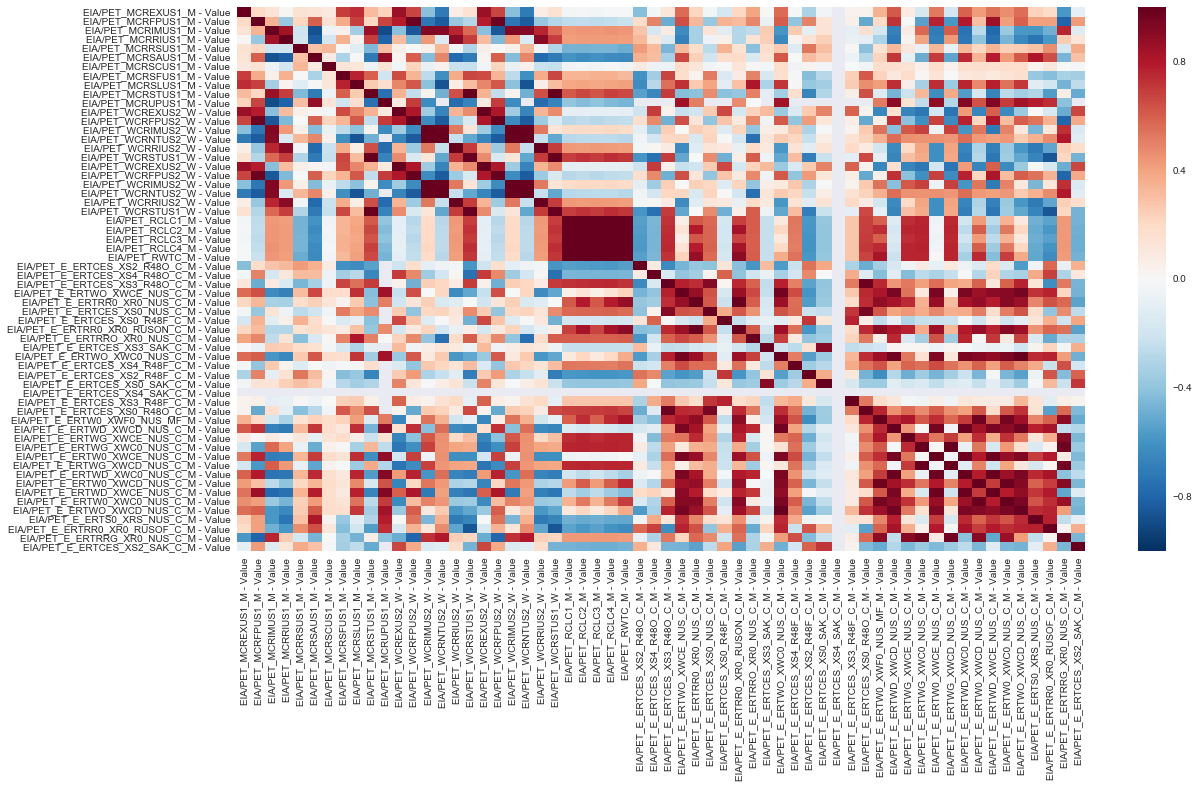

In [126]:
plt.figure(figsize = (19,10))
sns.heatmap(crude.corr())

### Staring to think I should not be picking out the factors

### Search for Monthly Crude Oil API Keys
1. Use Regex for filter relevant API keys
2. Pass list of API Keys to quandl

#### Returns ~ 70K Keys

In [104]:
monthly_codes = eia_codes[eia_codes['API_Key'].str.contains('^EIA/PET_.*_M$',regex=True)]
monthly_codes

,API_Key,Description
27,EIA/PET_M_EPPK_EEX_NUS_NBX_MBBLD_M,"U.S. Exports to Brunei of Kerosene, Monthly"
28,EIA/PET_M_EPOBGC0_IM0_NUS_NSK_2_M,U.S. Imports from Slovakia of Conventional Gas...
56,EIA/PET_MD1NT_NUS_NLI_2_M,U.S. Net Imports from Liberia of Distillate Fu...
63,EIA/PET_EMA_EPMRU_PWA_SNH_DPG_M,New Hampshire Conventional Gasoline Regular Wh...
66,EIA/PET_EMA_EPMPU_PRA_R1Z_DPG_M,Lower Atlantic (PADD 1C) Conventional Gasoline...
67,EIA/PET_EMA_EPMPU_PBS_SIN_DPG_M,Indiana Conventional Gasoline Premium Bulk Sal...
68,EIA/PET_EMA_EPD2DH_POA_R10_DPG_M,East Coast (PADD 1) No 2 Diesel High Sulfur Ot...
70,EIA/PET_M_EPC43B_FPF_SWY_MBBLD_M,Wyoming Crude Oil and Lease Condensate Product...
73,EIA/PET_EMA_EPM0R_PTA_STX_DPG_M,Texas Reformulated Gasoline Retail Sales by Al...
74,EIA/PET_EMA_EPD2D_POA_SOH_DPG_M,Ohio No 2 Diesel Other End Users Price by All ...


### API call times out.  Can only make 2K calls per 10 minutes

In [117]:
###API call on the 70K factors###

# quandl.get(list(monthly_codes.API_Key))

# Pulling bulk Petroleum Data in JSON format
http://api.eia.gov/bulk/PET.zip

#### Going to build a pipeline for the JSON file